In [1]:
import numpy as np
import cupy as cp
import cupyx.scipy.signal as signal
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from astropy.modeling import models, fitting
import astropy.units as u
from astropy import constants as const
from astropy.stats import gaussian_sigma_to_fwhm,gaussian_fwhm_to_sigma

import datetime
import pickle
import importlib
import json
import time
import glob

from data.eve_const import wavelength_full,line_name,line_window,initial_guess
from do_wavelet import do_wavelet

In [4]:
band_index = 3
with open('./data/daily_df/daily_df_'+line_name[band_index]+'.pkl', 'rb') as file:
    daily_df = pickle.load(file)
daily_df

median_of_mean  median_of_stddev  median_of_amplitude  \
time                                                                
2010-04-30       28.418953          0.030460             0.000296   
2010-05-01       28.419389          0.030740             0.000298   
2010-05-02       28.419604          0.030623             0.000321   
2010-05-03       28.418632          0.030502             0.000336   
2010-05-04       28.416663          0.030356             0.000321   
...                    ...               ...                  ...   
2014-05-21       28.421292          0.031779             0.000907   
2014-05-22       28.421038          0.031520             0.000868   
2014-05-23       28.420075          0.031146             0.000831   
2014-05-24       28.418871          0.030978             0.000800   
2014-05-25       28.418394          0.031190             0.000759   

            stddev_of_mean  stddev_of_stddev  stddev_of_amplitude  \
time                                                                
2010-04-30        0.000312          0.000243             0.000005   
2010-05-01        0.000366          0.000222             0.000007   
2010-05-02        0.000350          0.000240             0.000012   
2010-05-03        0.000813          0.000413             0.000007   
2010-05-04        0.000579          0.000384             0.000010   
...                    ...               ...                  ...   
2014-05-21        0.000422          0.000244             0.000017   
2014-05-22        0.000647          0.000434             0.000027   
2014-05-23        0.000746          0.000270             0.000018   
2014-05-24        0.000591          0.000259             0.000018   
2014-05-25        0.000645          0.000275             0.000021   

            available_data  
time                        
2010-04-30            8570  
2010-05-01            8579  
2010-05-02            8579  
2010-05-03            8640  
2010-05-04            8578  
...                    ...  
2014-05-21            8581  
2014-05-22            8582  
2014-05-23            8582  
2014-05-24            8582  
2014-05-25            8514  

[1487 rows x 7 columns]

In [8]:
daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]

In [16]:
property_list=['amplitude','mean','stddev']

In [19]:
property

'amplitude'

Data variance =  3.6292410682575752e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


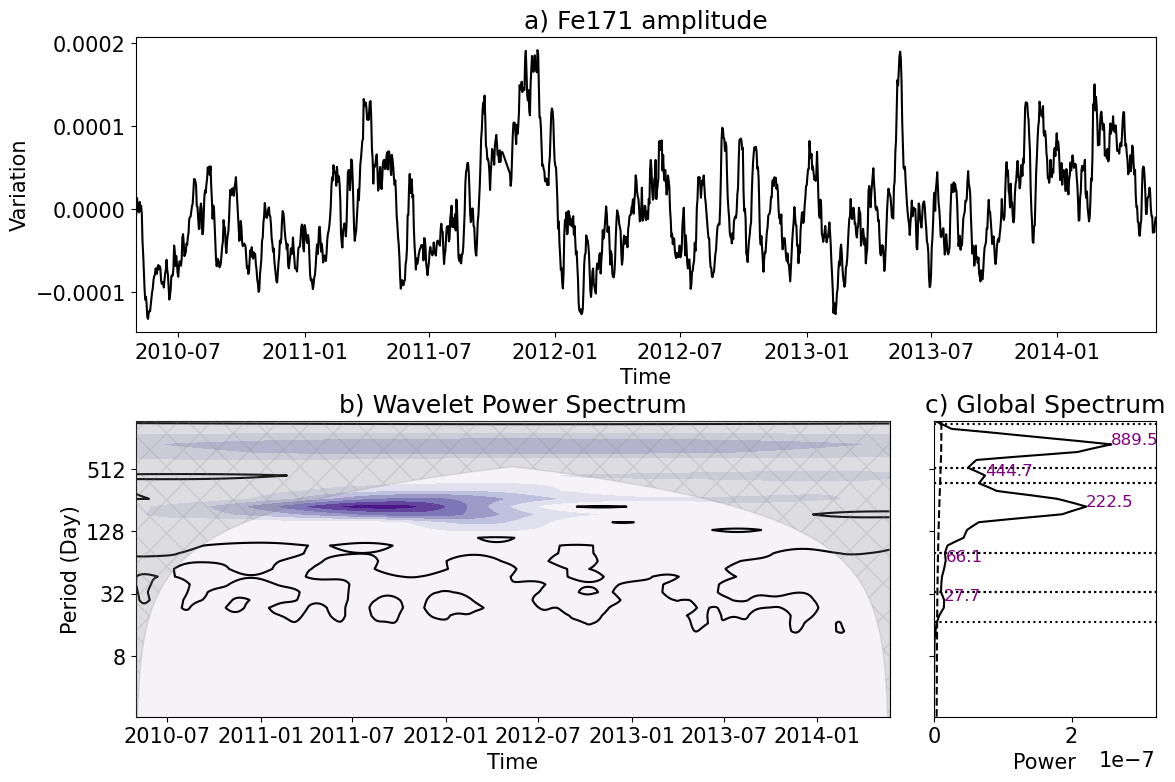

Data variance =  8.207428578316341e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


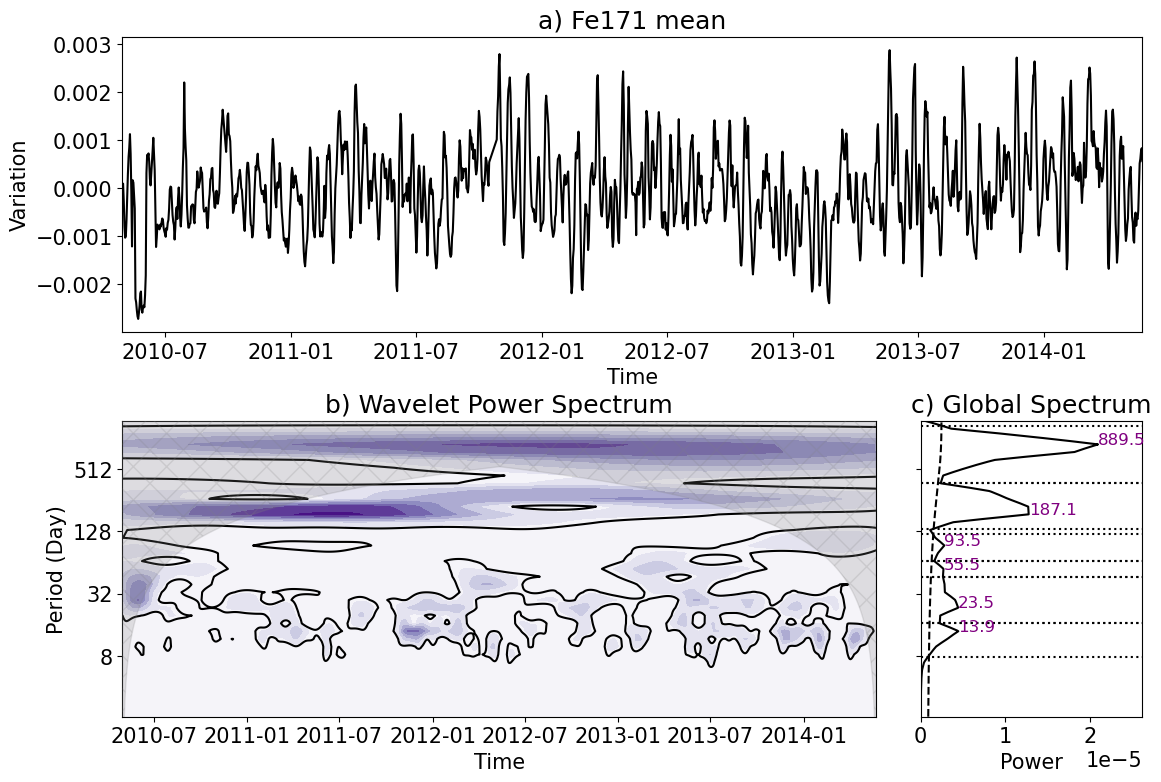

Data variance =  3.816214260865629e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


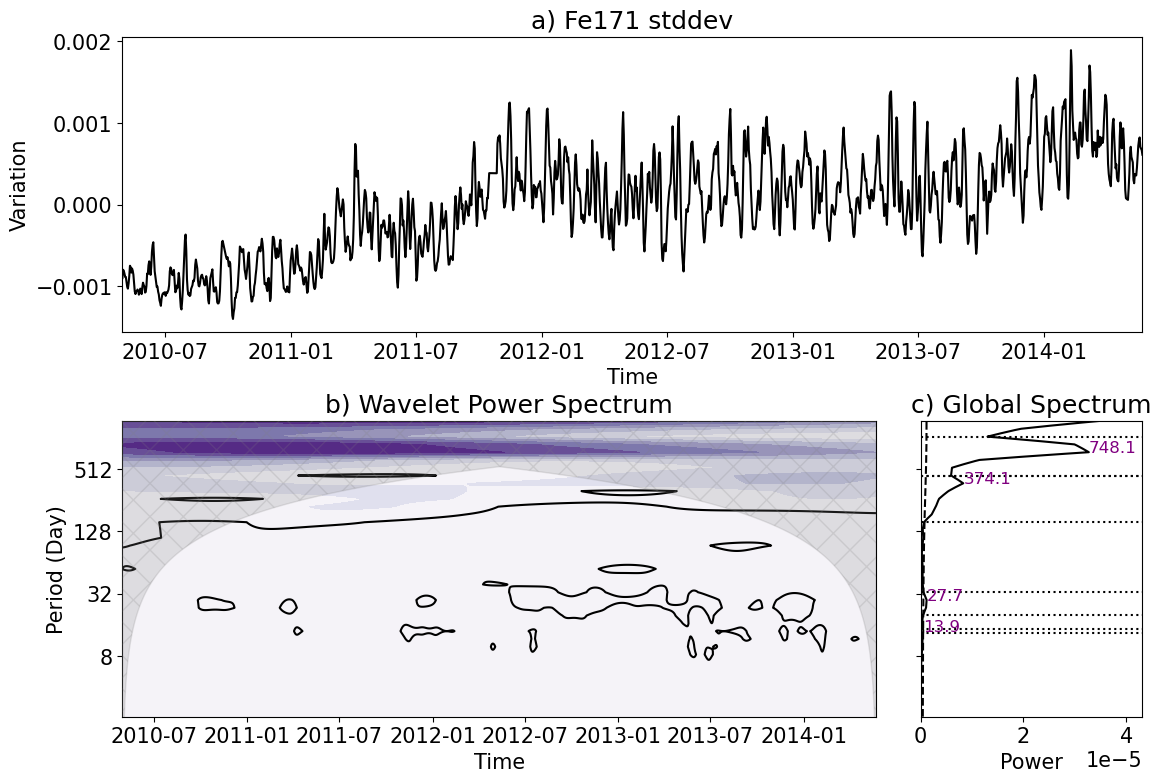

Data variance =  1.0380796285379144e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


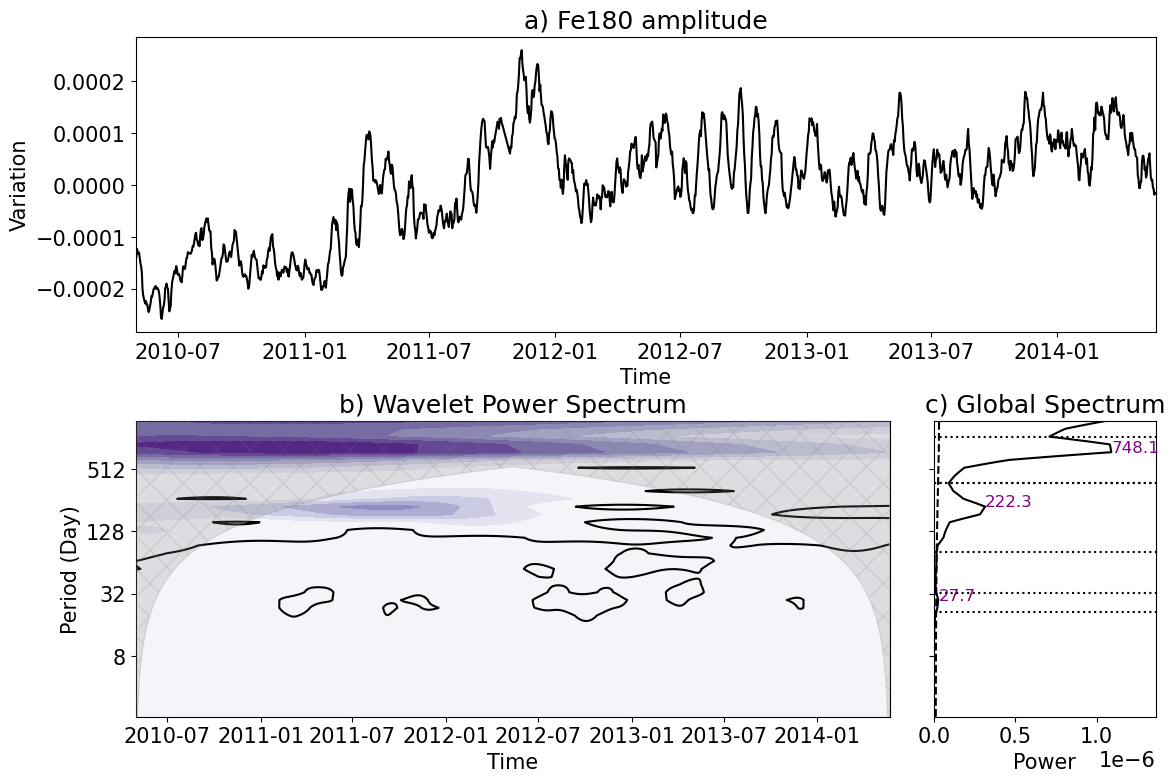

Data variance =  1.0589607657932313e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


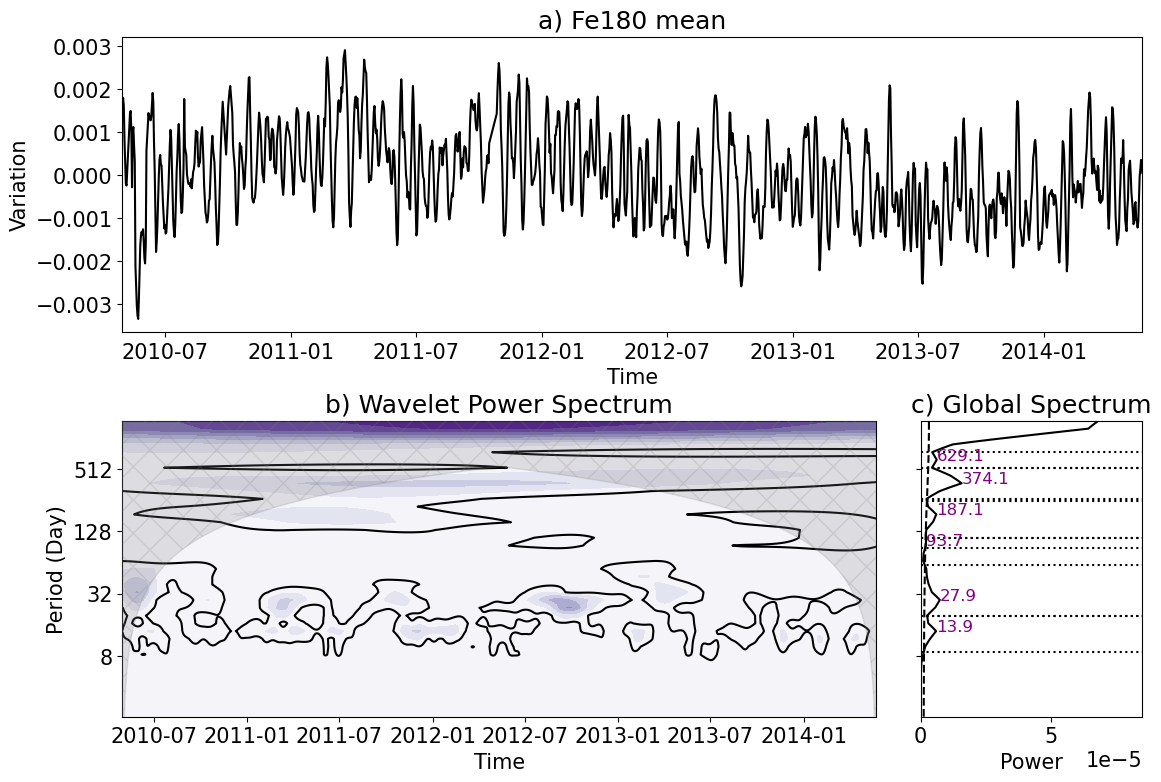

Data variance =  3.286558866267282e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


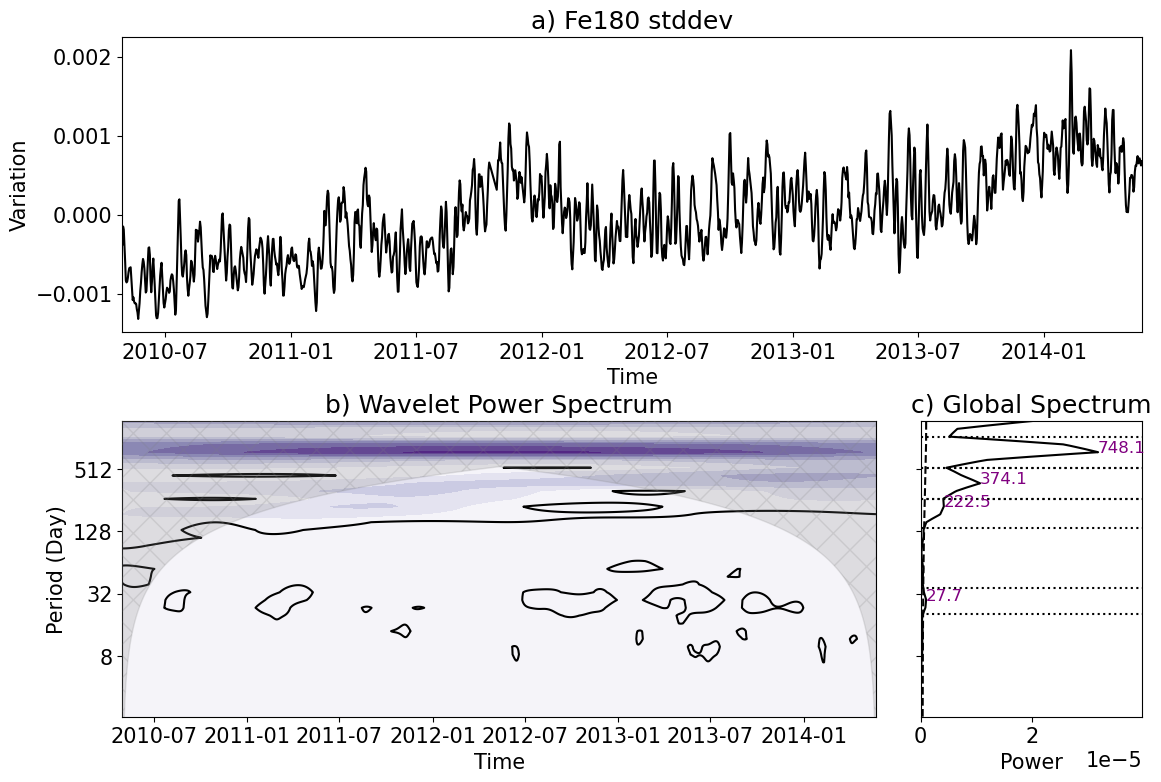

Data variance =  1.455849757278349e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


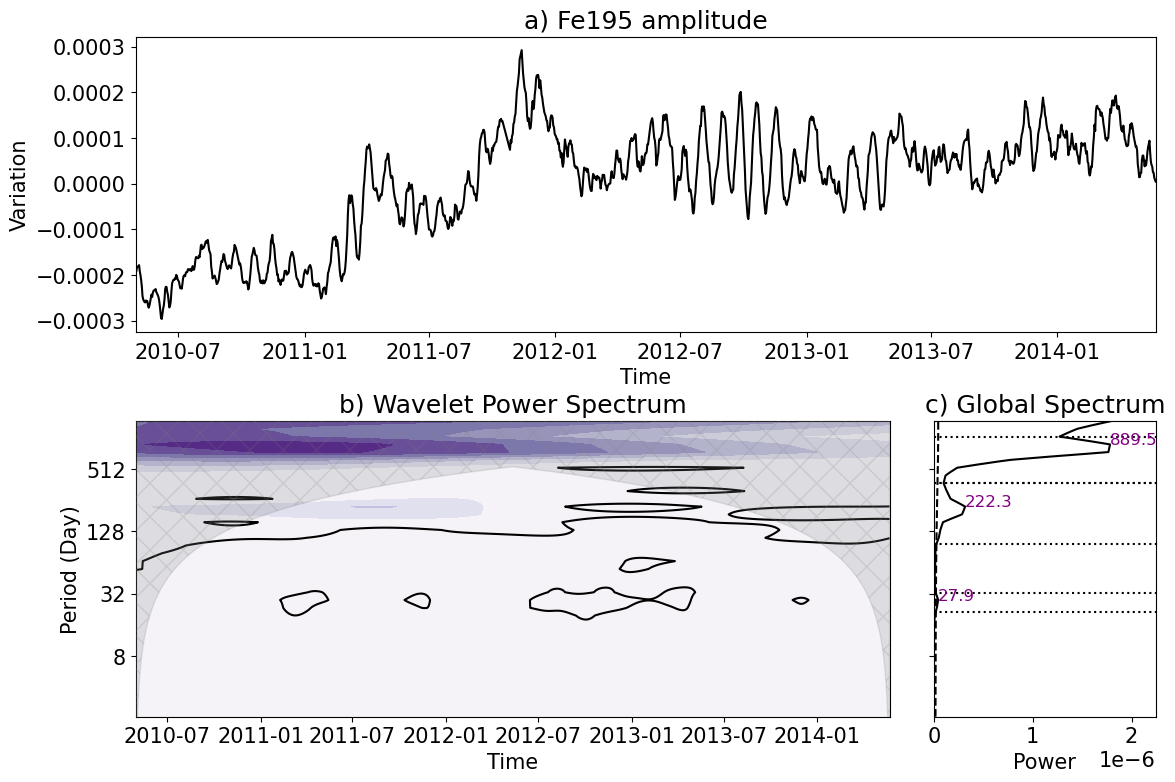

Data variance =  2.342028197011416e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


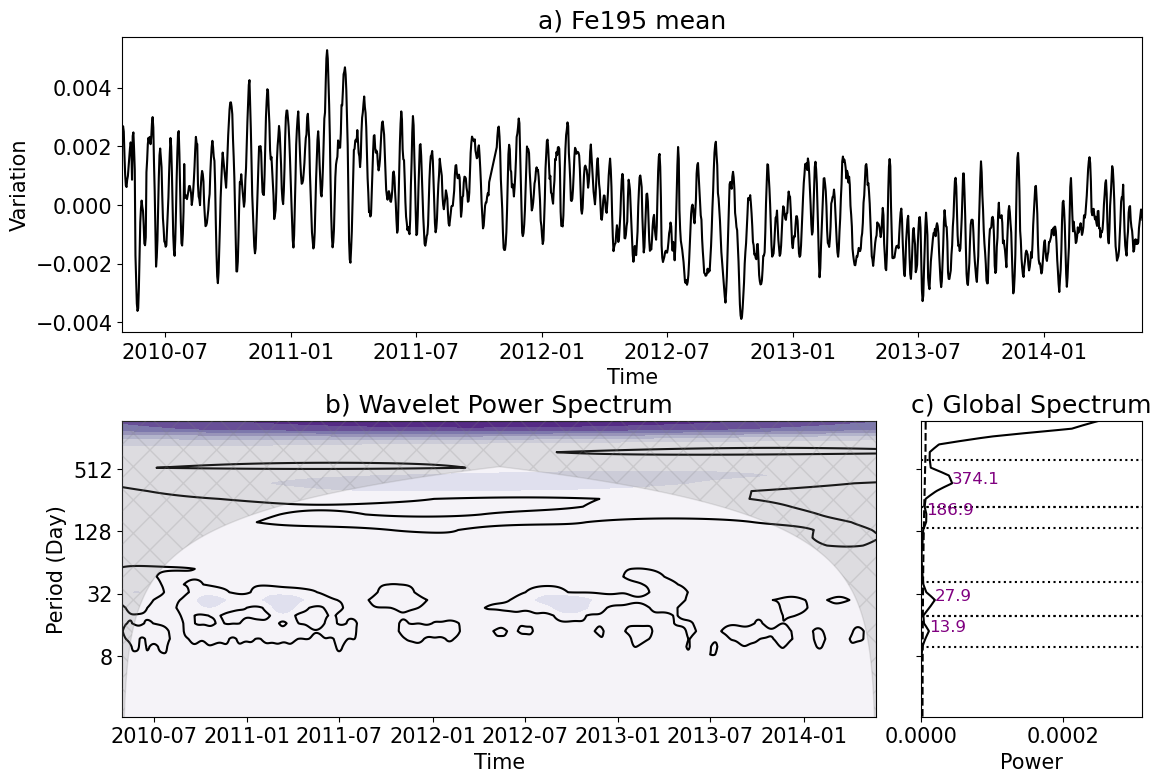

Data variance =  2.3620564539026524e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


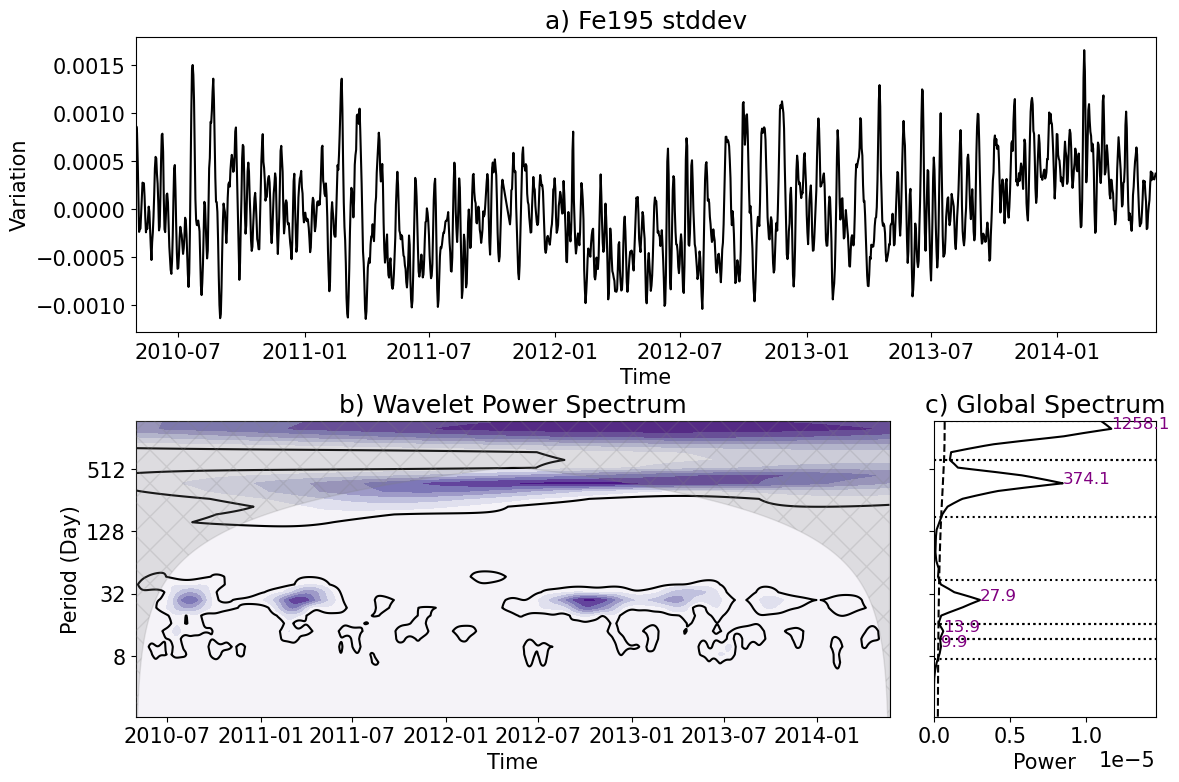

Data variance =  1.0089817524025721e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


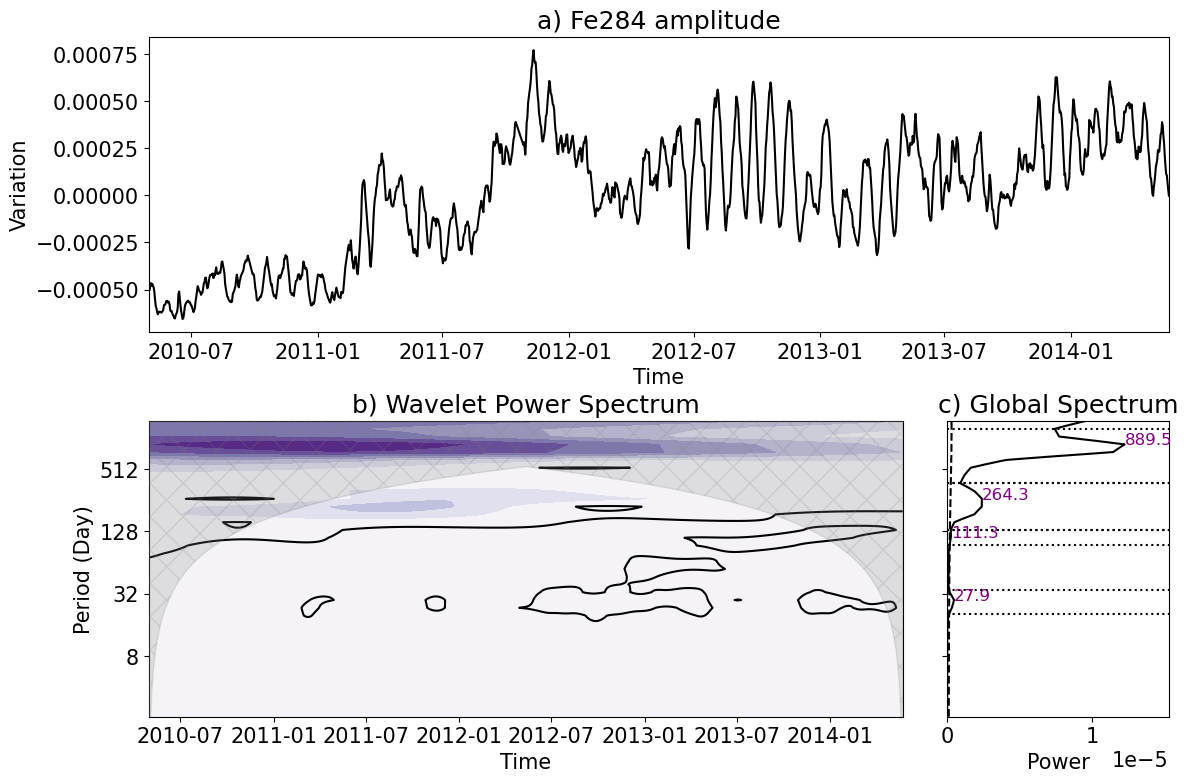

Data variance =  5.993295372206706e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


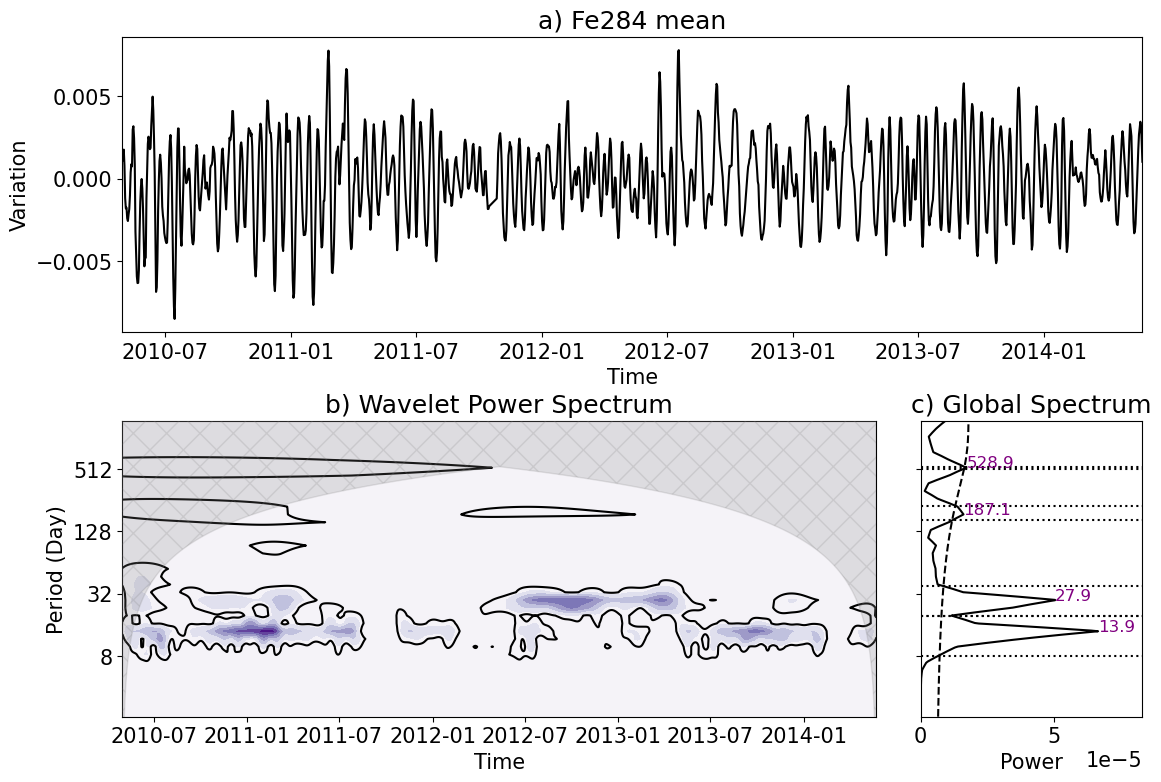

Data variance =  1.927906949953543e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


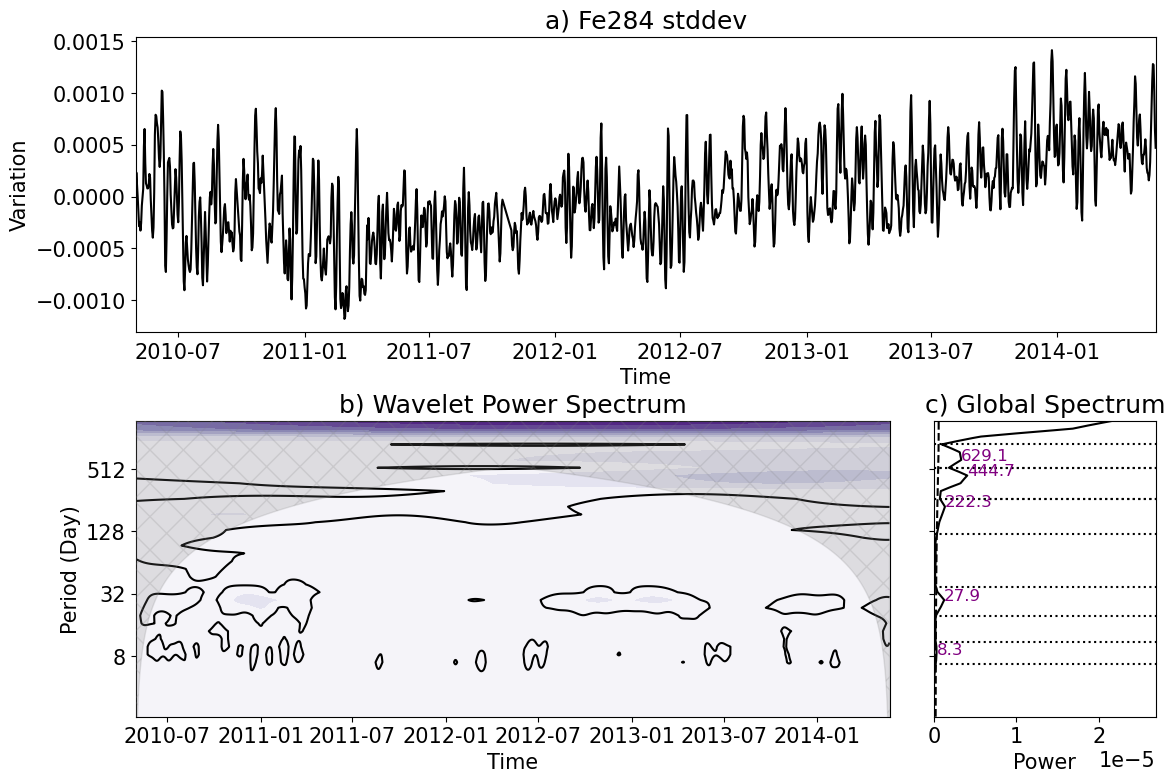

Data variance =  1.9702383246031844e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


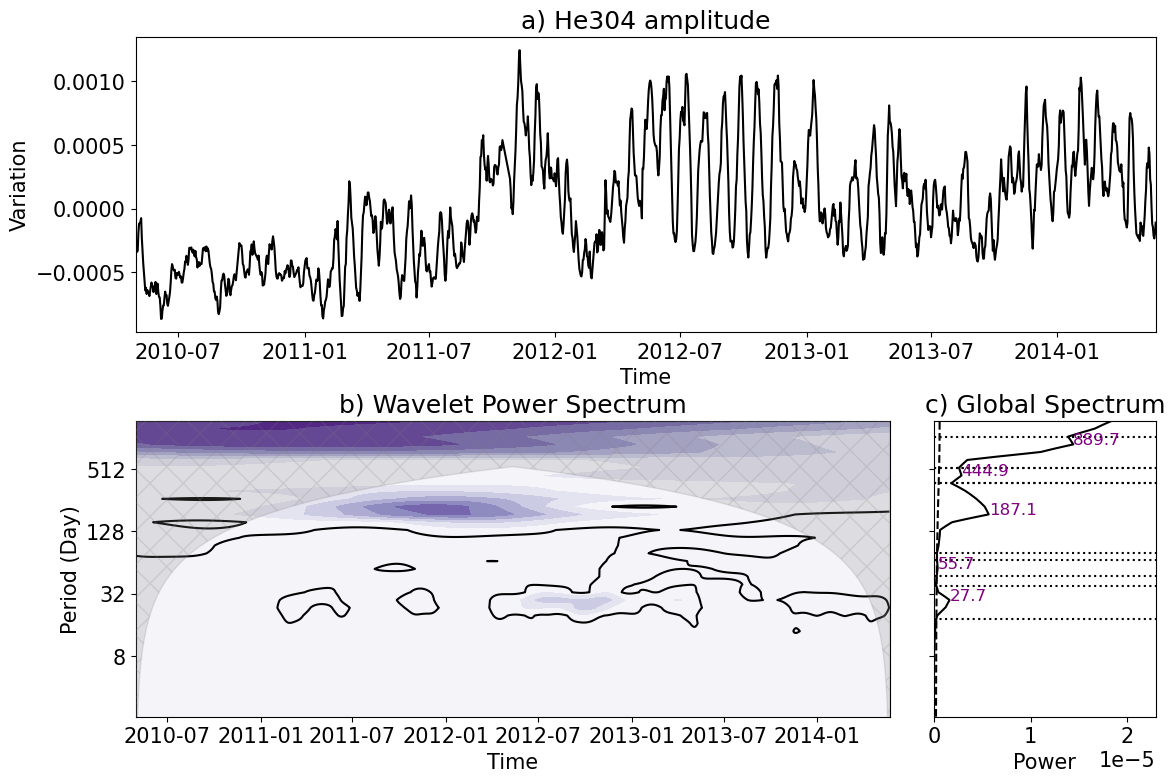

Data variance =  8.671178713403961e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


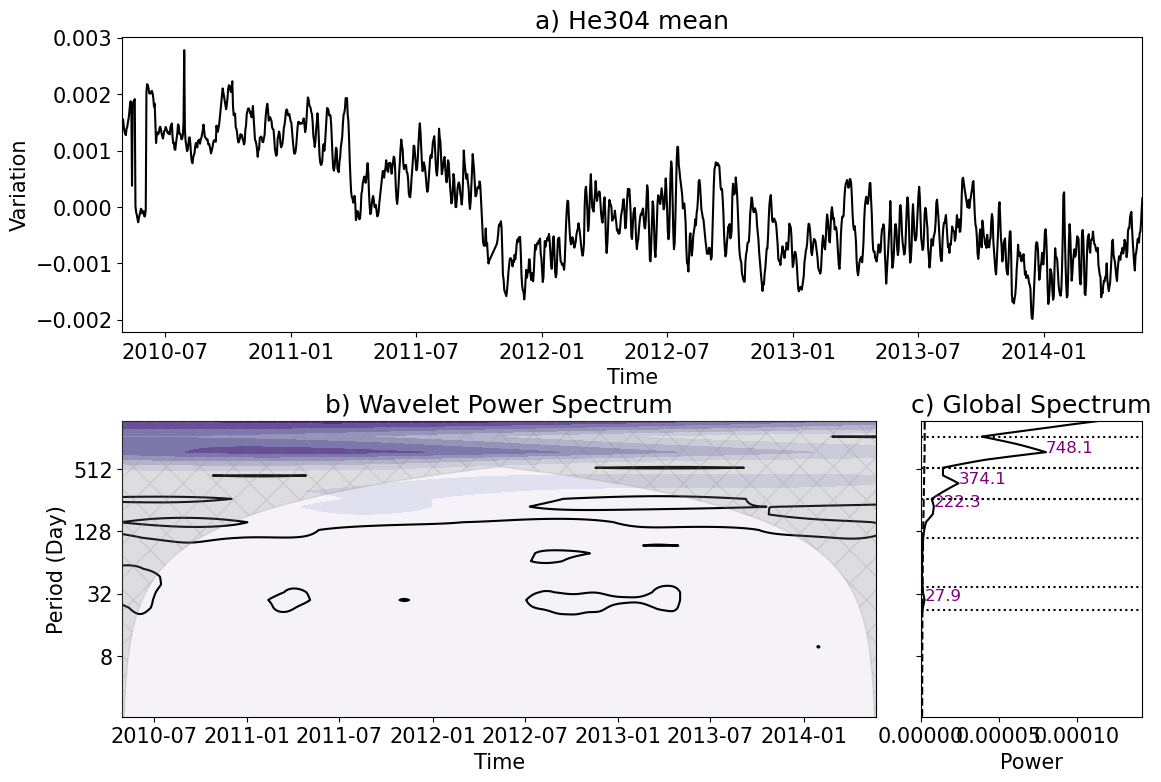

Data variance =  9.119226198517516e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


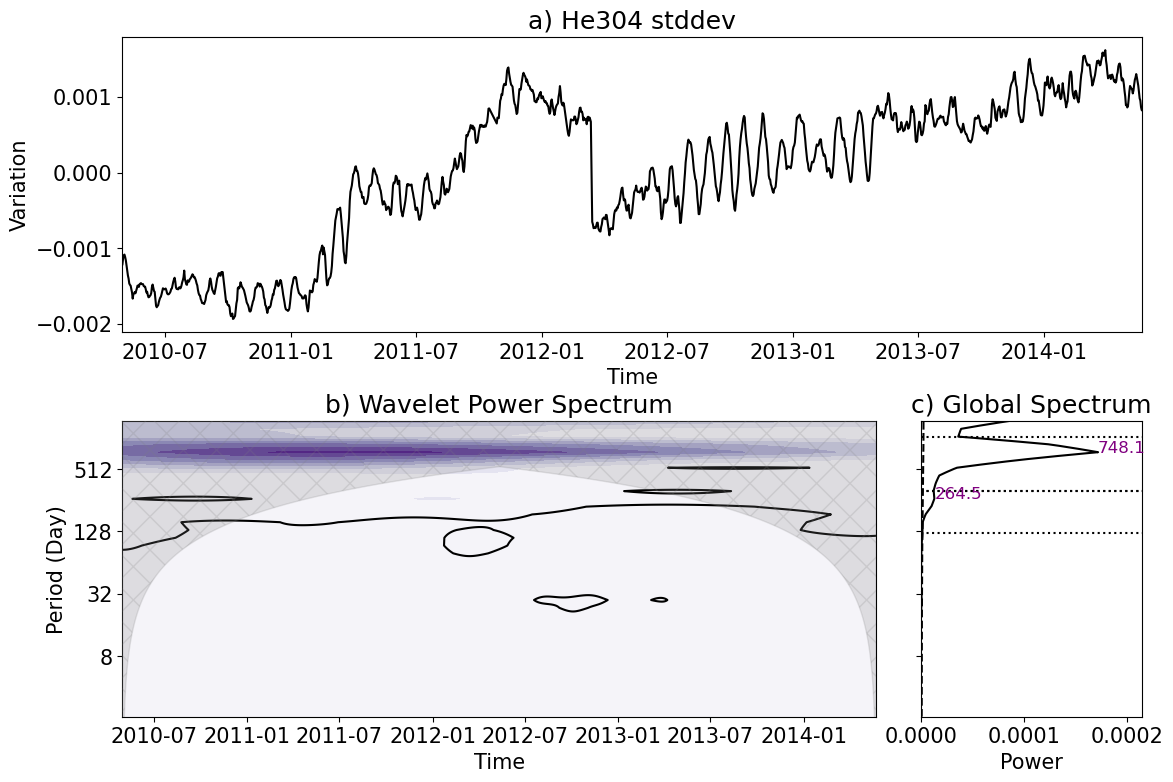

Data variance =  2.8892273109517047e-10


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


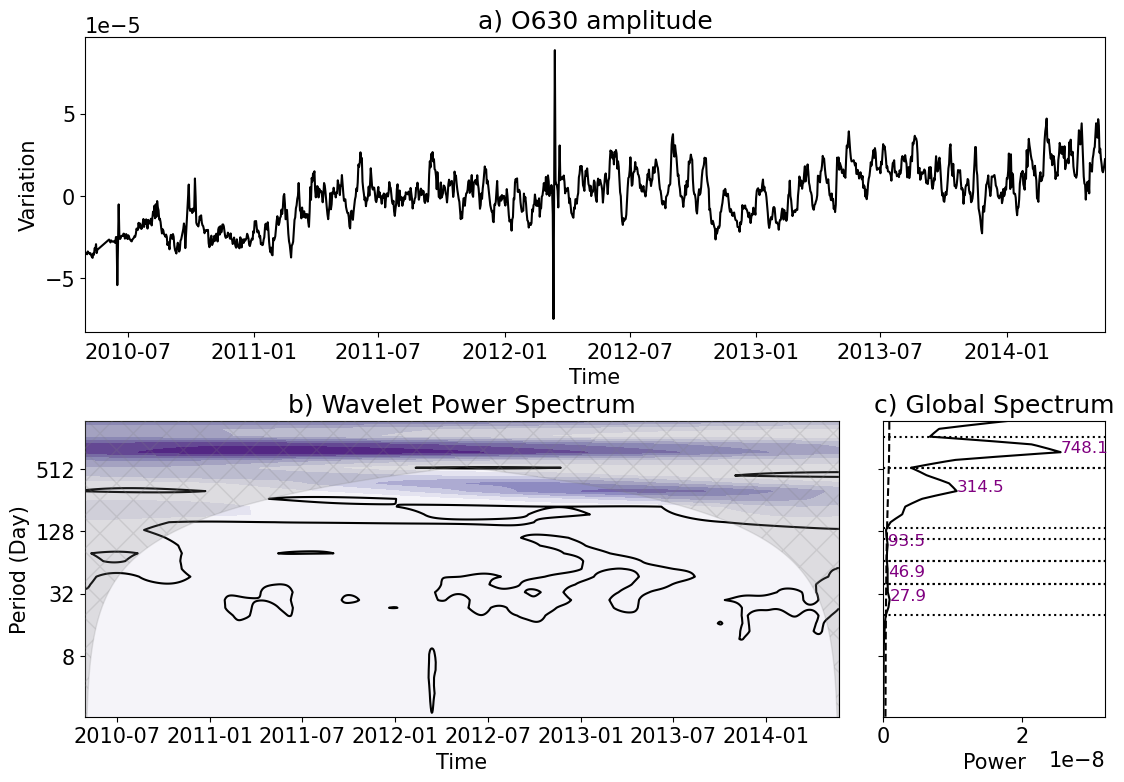

Data variance =  2.383466433709928e-06


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


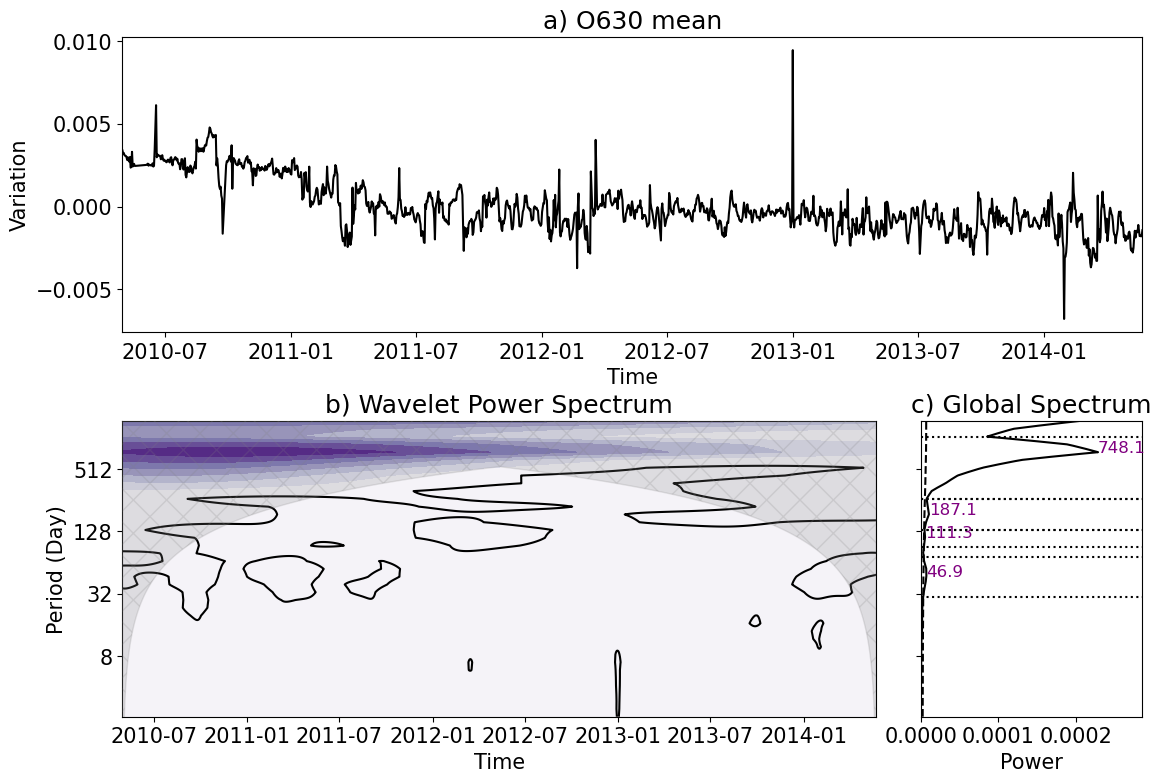

Data variance =  8.555596743270089e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


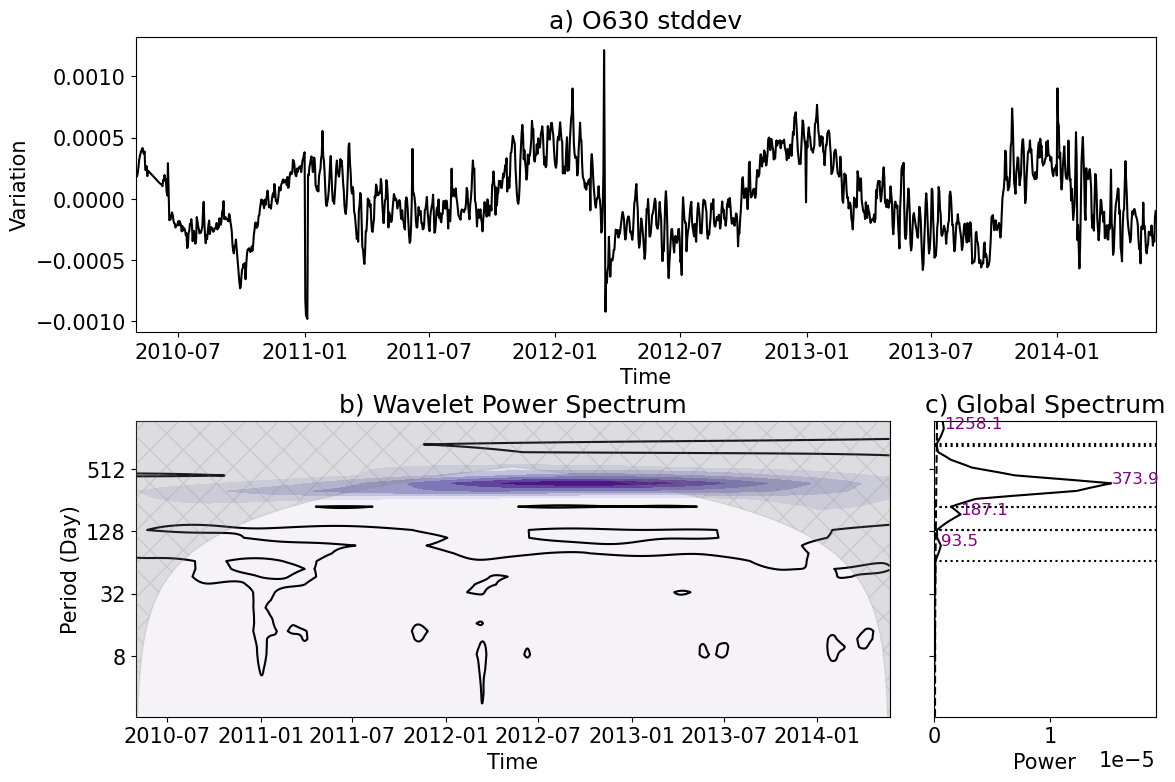

Data variance =  9.251126219580479e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


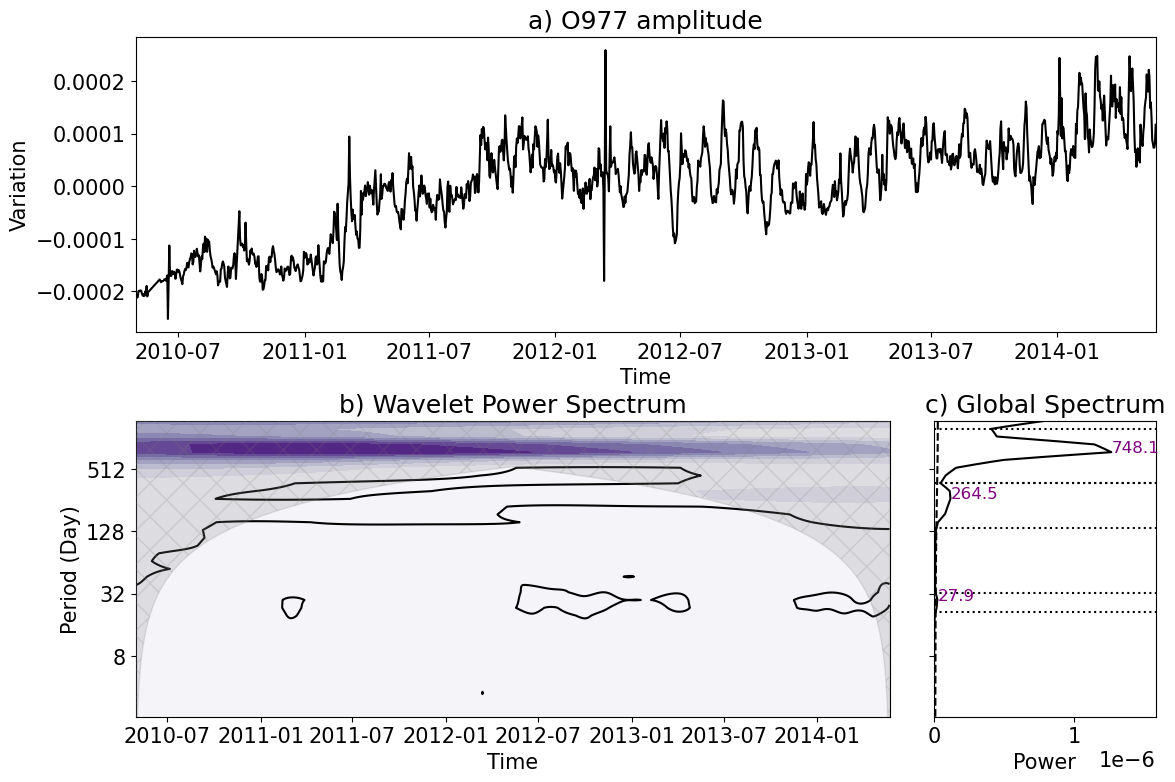

Data variance =  7.427456106685924e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


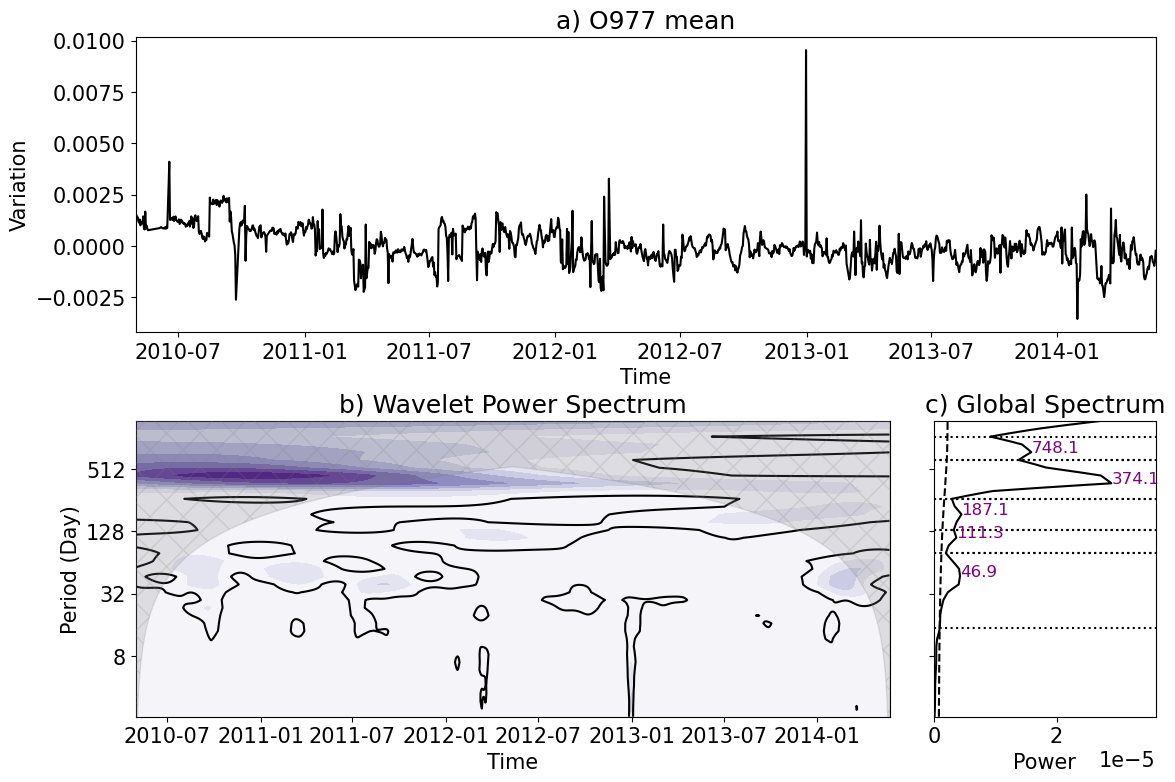

Data variance =  2.8056367018835638e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


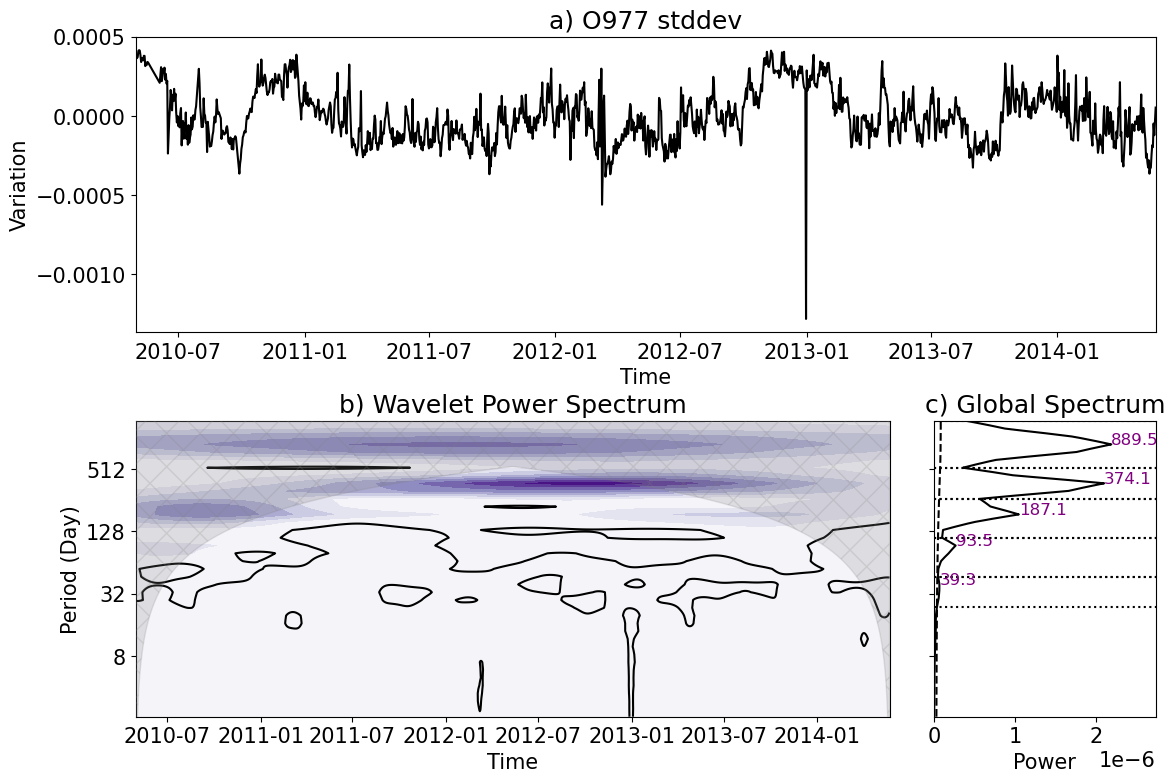

Data variance =  3.4361475649051383e-09


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


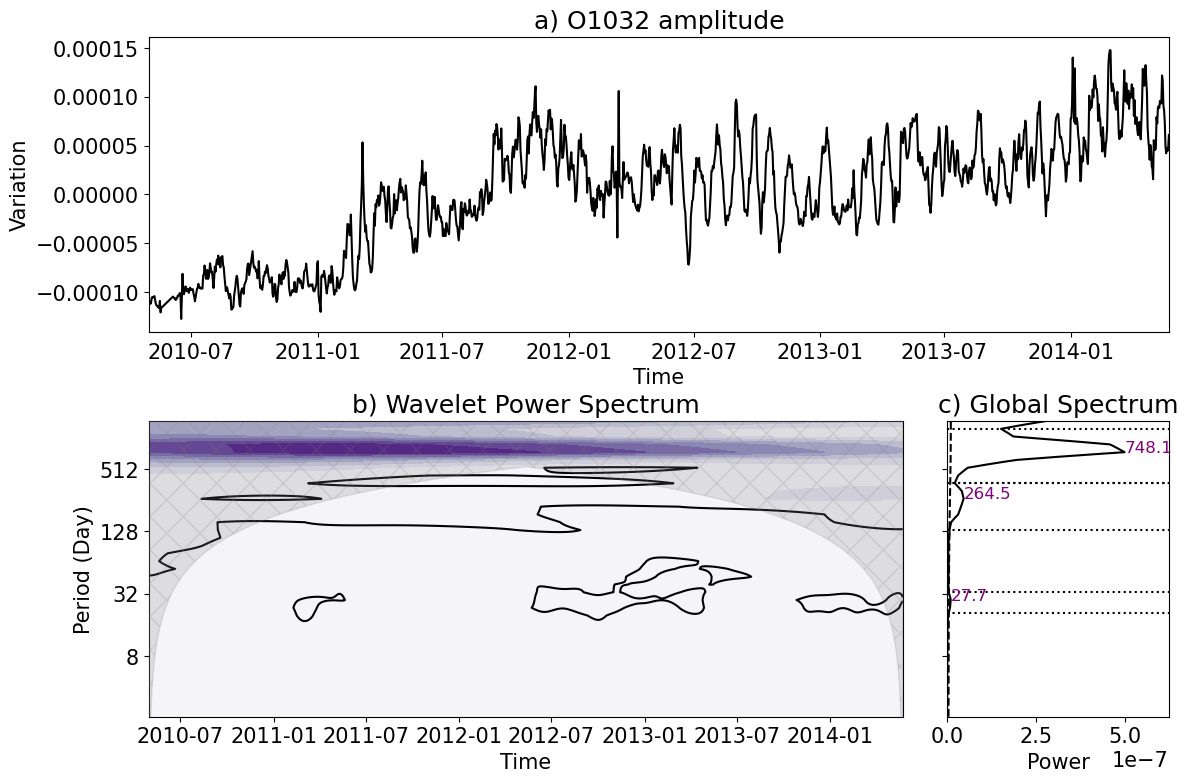

Data variance =  9.866902989347061e-07


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


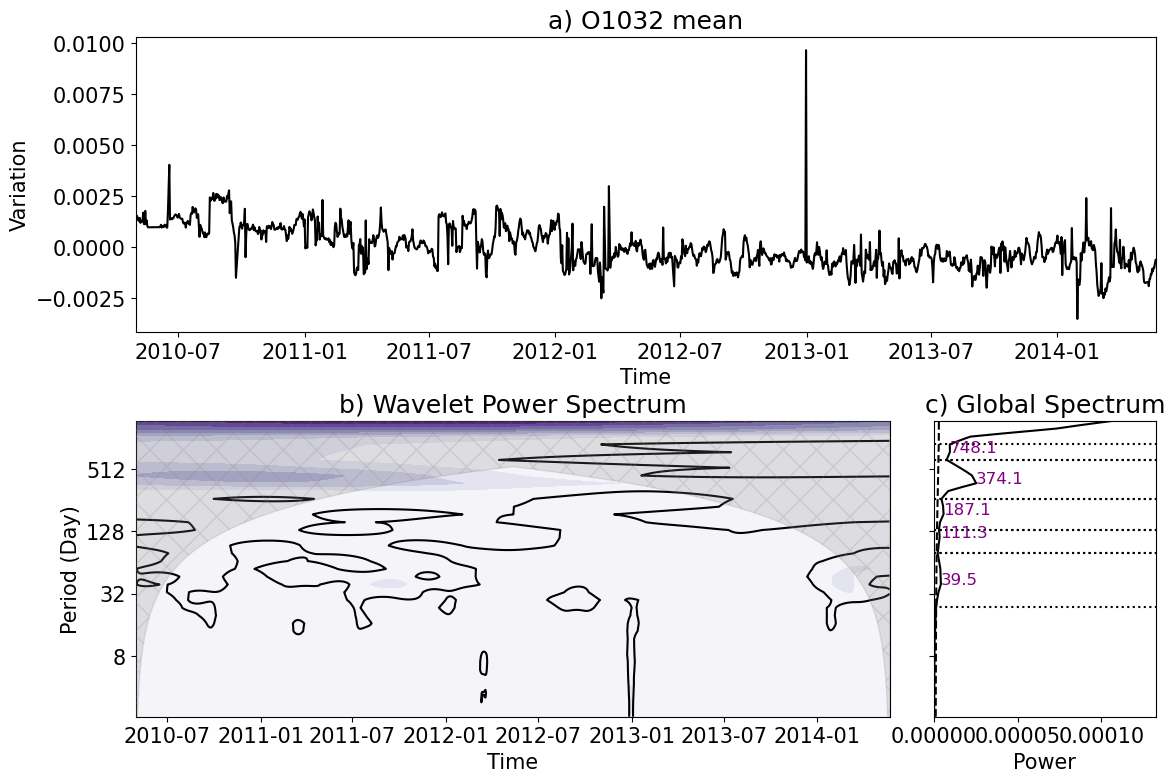

Data variance =  6.888342828200484e-08


d:\py_repo\EVE-spectrum-correction\Chapter4_v3\basic_ops\eve_ops\do_wavelet.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


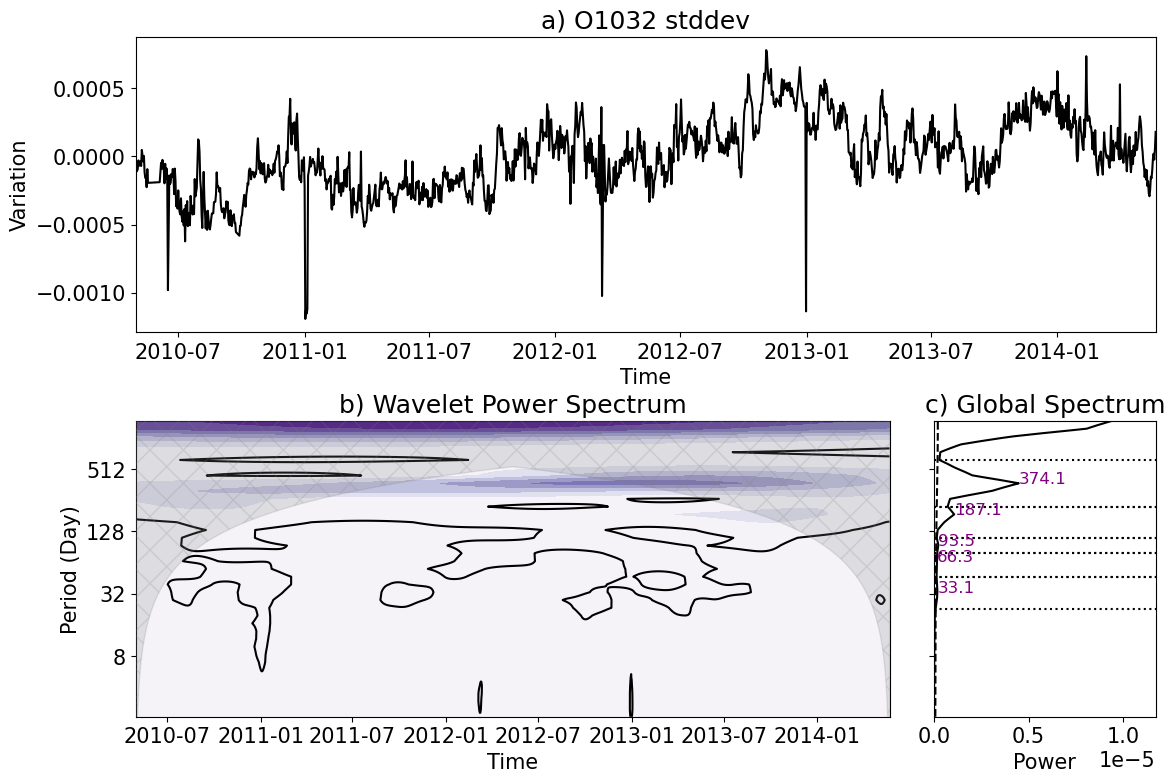

In [22]:
for band_index in range(len(line_name)):
    with open('./data/daily_df/daily_df_'+line_name[band_index]+'.pkl', 'rb') as file:
        daily_df = pickle.load(file)
    # 不知道为什么不加下面这一行会报错
    daily_df=daily_df[daily_df.index<=pd.to_datetime('2014-05-24')]

    for property in property_list:
        do_wavelet(sst=daily_df['median_of_'+property].values,
           dt=1,
           time=daily_df.index,
           show_peaks=True,
           unit=None,
           title=line_name[band_index]+' '+property,
           fig_name='output/daily_wavelet/'+property+'/'+line_name[band_index]+'_wavelet.png') 
    

In [14]:
x=27
365.26*x/(365.26+x)

25.1415387753021